In [1]:
import time
import os
import glob

In [2]:
#[1] Get targeted filelist

path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

target='.ome.tif'

filelist=glob.glob(path+str('*')+target)

In [3]:
import skimage.io as io
io.use_plugin('tifffile')

#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [4]:
filepath=filelist[0]

In [5]:
##Extract channel information for a given filepath
[Hoechst_stack, GFP_stack] = load_ome(filepath)

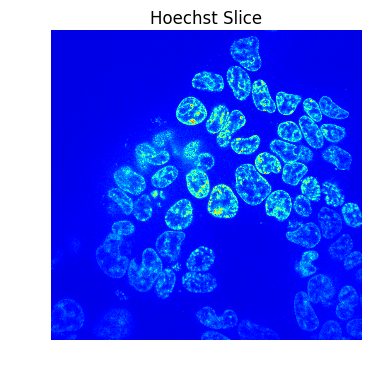

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(Hoechst_stack[4])
plt.axis('off')
plt.title('Hoechst Slice')

#Note uneven illumination

**Detect Edges**

In [23]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

im = Hoechst_stack

im = ndimage.gaussian_filter(im, 5)

sx = ndimage.sobel(im[4], axis=0, mode='constant')
sy = ndimage.sobel(im[4], axis=1, mode='constant')
sob = np.hypot(sx, sy)


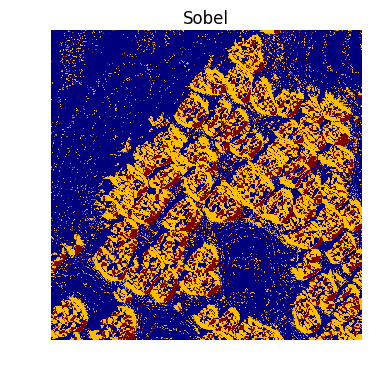

In [24]:
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel')

In [27]:
#Get targeted mask filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output/'

target='_Mask5.npy'

filelist=glob.glob(path+str('*')+target)

In [28]:
filepath=filelist[0]

In [29]:
##Import mask
mask5 = np.load(filelist[0])

In [38]:
#im = ndimage.gaussian_filter(mask5, 25)

sx = ndimage.sobel(mask5[4], axis=0, mode='constant')
sy = ndimage.sobel(mask5[4], axis=1, mode='constant')
sob = np.hypot(sx, sy)

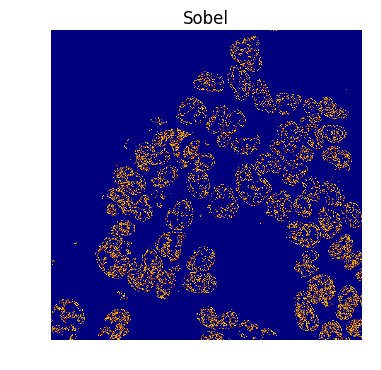

In [39]:
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel')

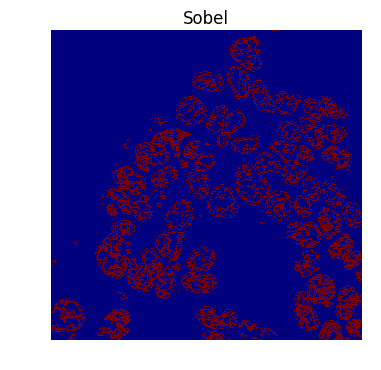

In [40]:
plt.imshow(sob>0)
plt.axis('off')
plt.title('Sobel')

In [41]:
from scipy.ndimage import morphology
filled_blob=morphology.binary_fill_holes(sob>0)

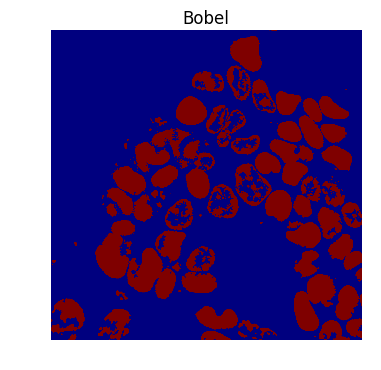

In [42]:
plt.imshow(filled_blob>0)
plt.axis('off')
plt.title('Bobel')

In [46]:
#Can this be done fast in 3D
# sx = ndimage.sobel(mask5, axis=0, mode='constant')
# sy = ndimage.sobel(mask5, axis=1, mode='constant')
# sob = np.hypot(sx, sy)
from scipy.ndimage import sobel, generic_gradient_magnitude
mag = generic_gradient_magnitude(mask5, sobel)

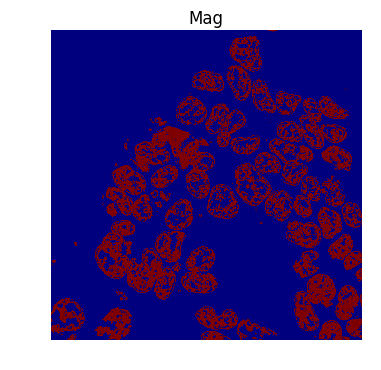

In [57]:
plt.imshow(mag[5])
plt.axis('off')
plt.title('Mag')

In [58]:
filled_blob=morphology.binary_fill_holes(mag[5])

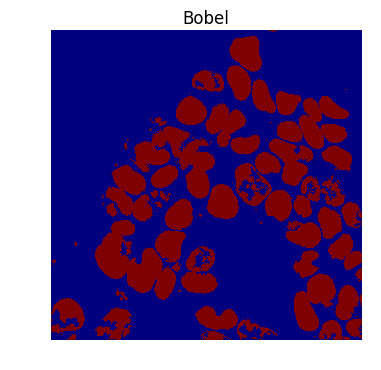

In [59]:
plt.imshow(filled_blob)
plt.axis('off')
plt.title('Bobel')

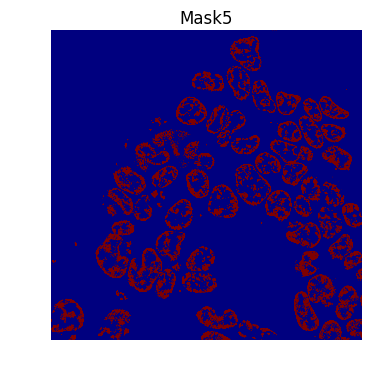

In [54]:
plt.imshow(mask5[4])
plt.axis('off')
plt.title('Mask5')

In [55]:
filled_mask=morphology.binary_fill_holes(mask5[4])

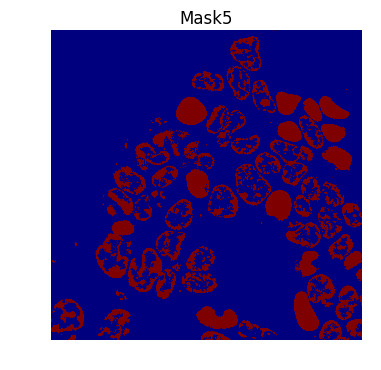

In [56]:
plt.imshow(filled_mask)
plt.axis('off')
plt.title('Mask5')

In [60]:
#Compare 2D and 3D sobel
mag2D = generic_gradient_magnitude(mask5[4], sobel)
mag3D = generic_gradient_magnitude(mask5, sobel)[4]

(<matplotlib.axes._subplots.AxesSubplot at 0xa606d30>,
 <matplotlib.text.Text at 0xa176f98>)

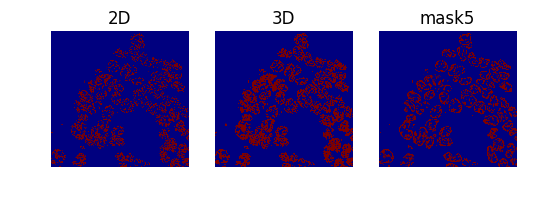

In [63]:
#Compare
plt.subplot(1,3,1), plt.imshow(mag2D)
plt.subplot(1,3,1), plt.axis('off')
plt.subplot(1,3,1), plt.title('2D')
plt.subplot(1,3,2), plt.imshow(mag3D)
plt.subplot(1,3,2), plt.axis('off')
plt.subplot(1,3,2), plt.title('3D')
plt.subplot(1,3,3), plt.imshow(mask5[4])
plt.subplot(1,3,3), plt.axis('off')
plt.subplot(1,3,3), plt.title('mask5')

In [78]:
im = Hoechst_stack

im = ndimage.gaussian_filter(im, 3)

#3D sobel is really fast but weakly discriminative
homag3D = generic_gradient_magnitude(im, sobel)

(<matplotlib.axes._subplots.AxesSubplot at 0xf0201cf8>,
 <matplotlib.text.Text at 0x9c5b6240>)

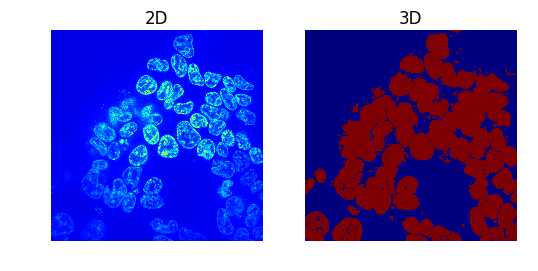

In [86]:
#Compare
plt.subplot(1,2,1), plt.imshow(Hoechst_stack[4])
plt.subplot(1,2,1), plt.axis('off')
plt.subplot(1,2,1), plt.title('2D')
plt.subplot(1,2,2), plt.imshow(homag3D[4]>20)
plt.subplot(1,2,2), plt.axis('off')
plt.subplot(1,2,2), plt.title('3D')

In [70]:
homag3D[4]

array([[ 0, 12, 17, ...,  0,  0,  0],
       [ 0,  5, 17, ...,  0,  0,  0],
       [ 5, 12, 16, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 39, 36, 41],
       [ 0,  0,  0, ..., 38, 30, 23],
       [ 0,  0,  0, ..., 24, 19, 14]], dtype=uint16)

In [73]:
#Get targeted mask filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output/'

target='_Mask2.npy'

filelist=glob.glob(path+str('*')+target)

In [74]:
##Import mask2
mask2 = np.load(filelist[0])

(-0.5, 2047.5, 2047.5, -0.5)

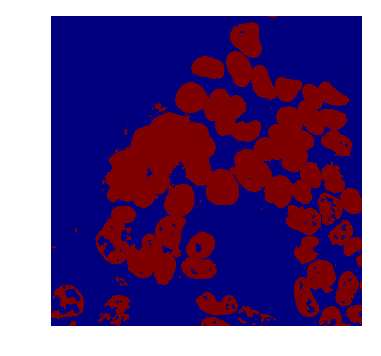

In [75]:
plt.imshow(mask2[4])
plt.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

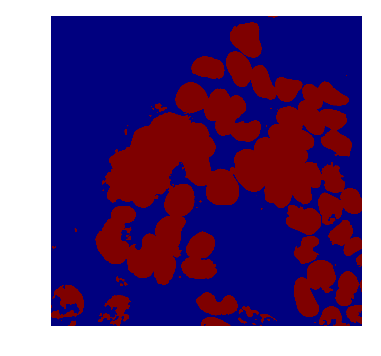

In [77]:
fill2Dmask2 = morphology.binary_fill_holes(mask2[4])
plt.imshow(fill2Dmask2)
plt.axis('off')